**Python Day 4**

1. Joining dataframes
2. Transpose, pivot, melt (wide and long formats)
3. Data visualization
4. SQLite Databases

**Import necesssary modules**

In [1]:
import pandas as pd
import numpy as np

# Joining dataframes

- Data spread across multiple files
- Relationship of the dataset will impact how we join them...

**Scenarios:**
1. Two datasets with same column names `pd.concat()`
2. Adding columns from one dataframe to another `pd.concat()`
3. Merge two dataframes to join columns `merge()`

**DISCLAIMER:** we'll be making some mock data for this portion of the lesson, but the commands are exactly the same if these were your real data. You'd just import your `.csv` into a datafraame, instead of creating mock dataframes ;) 

## Scenario 1 - Two datasets with same column names

In [2]:
# first, let's make two mock files from "SN7577.tab"
df = pd.read_csv("SN7577.tab", sep = "\t")
df_a = df.head(10)
df_b = df.tail(20)
# if you have two files, you can just import them using different names.

In [3]:
df_a

,Q1,Q2,Q3,Q4,Q5ai,Q5aii,Q5aiii,Q5aiv,Q5av,Q5avi,...,numhhd,numkid,numkid2,numkid31,numkid32,numkid33,numkid34,numkid35,numkid36,wts
0,1,-1,1,8,0,0,0,1,0,0,...,3,11,2,0,0,0,0,1,0,1.11439
1,3,-1,1,4,0,0,0,0,0,0,...,3,11,2,0,0,0,0,1,0,2.56604
2,10,3,2,6,0,0,0,0,0,0,...,2,11,2,0,0,0,0,1,0,2.04468
3,9,-1,10,10,0,0,0,0,0,0,...,1,-1,2,0,0,0,0,1,0,1.07592
4,10,2,6,1,0,0,0,1,0,0,...,1,-1,2,0,0,0,0,1,0,1.25068
5,1,-1,1,1,0,0,0,0,0,0,...,2,-1,2,0,0,0,0,1,0,0.85126
6,1,-1,1,8,0,0,0,0,0,0,...,2,-1,2,0,0,0,0,1,0,1.51383
7,1,-1,1,1,0,0,0,0,0,0,...,2,-1,2,0,0,0,0,1,0,0.86168
8,9,-1,10,10,0,0,0,0,0,0,...,2,11,2,0,0,0,0,1,0,0.48973
9,2,-1,1,1,0,0,0,0,0,0,...,1,-1,2,0,0,0,0,1,0,0.36381


In [4]:
df_b

,Q1,Q2,Q3,Q4,Q5ai,Q5aii,Q5aiii,Q5aiv,Q5av,Q5avi,...,numhhd,numkid,numkid2,numkid31,numkid32,numkid33,numkid34,numkid35,numkid36,wts
1266,2,-1,1,1,0,0,0,0,0,0,...,3,11,2,0,0,0,0,1,0,1.73196
1267,4,-1,3,4,0,0,0,1,0,1,...,1,-1,2,0,0,0,0,1,0,0.57340
1268,2,-1,4,4,0,0,0,0,0,1,...,1,-1,2,0,0,0,0,1,0,0.45117
1269,11,11,11,12,0,0,0,0,0,0,...,1,-1,2,0,0,0,0,1,0,1.18764
1270,10,2,3,3,1,0,0,0,0,0,...,1,-1,2,0,0,0,0,1,0,0.66939
1271,2,-1,1,6,0,0,0,0,0,0,...,2,-1,2,0,0,0,0,1,0,0.44399
1272,1,-1,1,5,0,0,0,0,0,0,...,2,-1,2,0,0,0,0,1,0,0.81670
1273,3,-1,4,5,0,0,0,0,0,0,...,2,-1,2,0,0,0,0,1,0,0.70474
1274,2,-1,3,6,0,0,0,0,0,0,...,2,-1,2,0,0,0,0,1,0,0.86370
1275,10,2,4,7,0,0,0,0,0,0,...,3,1,1,1,0,0,0,0,0,1.06163


In [5]:
# pd.concat([df_a, df_b]) # the resulting dataframes will have their original indices
complete_df = pd.concat([df_a, df_b]).reset_index(drop=True)
complete_df

,Q1,Q2,Q3,Q4,Q5ai,Q5aii,Q5aiii,Q5aiv,Q5av,Q5avi,...,numhhd,numkid,numkid2,numkid31,numkid32,numkid33,numkid34,numkid35,numkid36,wts
0,1,-1,1,8,0,0,0,1,0,0,...,3,11,2,0,0,0,0,1,0,1.11439
1,3,-1,1,4,0,0,0,0,0,0,...,3,11,2,0,0,0,0,1,0,2.56604
2,10,3,2,6,0,0,0,0,0,0,...,2,11,2,0,0,0,0,1,0,2.04468
3,9,-1,10,10,0,0,0,0,0,0,...,1,-1,2,0,0,0,0,1,0,1.07592
4,10,2,6,1,0,0,0,1,0,0,...,1,-1,2,0,0,0,0,1,0,1.25068
5,1,-1,1,1,0,0,0,0,0,0,...,2,-1,2,0,0,0,0,1,0,0.85126
6,1,-1,1,8,0,0,0,0,0,0,...,2,-1,2,0,0,0,0,1,0,1.51383
7,1,-1,1,1,0,0,0,0,0,0,...,2,-1,2,0,0,0,0,1,0,0.86168
8,9,-1,10,10,0,0,0,0,0,0,...,2,11,2,0,0,0,0,1,0,0.48973
9,2,-1,1,1,0,0,0,0,0,0,...,1,-1,2,0,0,0,0,1,0,0.36381


## Scenario 2 - Adding columns from one dataframe to another

In [6]:
# let's make a mock dataframe from `complete_df`
# for this to work, the new dataframe must have the same number of rows

list_len = complete_df.shape[0]
list_subject_names = []
list_numbers = list(np.random.choice(np.arange(1,999), list_len, replace=False))

for n in list_numbers:
    list_subject_names.append('subject'+str(n))

# print(list_subject_names)

# # make this list into a dataframe
subject_id = pd.DataFrame(list_subject_names, columns=['subject_id'])
# subject_id

In [7]:
# now, let's concat the column in `subject_id` to `complete_df`
complete_df = pd.concat([complete_df, subject_id], axis=1) # use axis=0 (default) for rows, axis=1 for column 
complete_df

,Q1,Q2,Q3,Q4,Q5ai,Q5aii,Q5aiii,Q5aiv,Q5av,Q5avi,...,numkid,numkid2,numkid31,numkid32,numkid33,numkid34,numkid35,numkid36,wts,subject_id
0,1,-1,1,8,0,0,0,1,0,0,...,11,2,0,0,0,0,1,0,1.11439,subject681
1,3,-1,1,4,0,0,0,0,0,0,...,11,2,0,0,0,0,1,0,2.56604,subject3
2,10,3,2,6,0,0,0,0,0,0,...,11,2,0,0,0,0,1,0,2.04468,subject321
3,9,-1,10,10,0,0,0,0,0,0,...,-1,2,0,0,0,0,1,0,1.07592,subject435
4,10,2,6,1,0,0,0,1,0,0,...,-1,2,0,0,0,0,1,0,1.25068,subject174
5,1,-1,1,1,0,0,0,0,0,0,...,-1,2,0,0,0,0,1,0,0.85126,subject729
6,1,-1,1,8,0,0,0,0,0,0,...,-1,2,0,0,0,0,1,0,1.51383,subject257
7,1,-1,1,1,0,0,0,0,0,0,...,-1,2,0,0,0,0,1,0,0.86168,subject241
8,9,-1,10,10,0,0,0,0,0,0,...,11,2,0,0,0,0,1,0,0.48973,subject849
9,2,-1,1,1,0,0,0,0,0,0,...,-1,2,0,0,0,0,1,0,0.36381,subject128


## Scenario 3 - Merge two dataframes to join columns

A. Dataframes share a key column with the same name  
B. Dataframes share a key column with different name

In [8]:
# let's make two mock dataframes from the newly `complete_df`
df1 = complete_df.loc[:10,['subject_id','Q1','Q2']]
df2 = complete_df.loc[:,['subject_id','Q3','Q4']]
df3 = complete_df.loc[:,['subject_id','Q3','Q4']].rename(columns={'subject_id':'subjectID'}).sort_values('subjectID')

### A. Dataframes share a key column with the same name

In [9]:
pd.merge(df1, df2, on = "subject_id")

,subject_id,Q1,Q2,Q3,Q4
0,subject681,1,-1,1,8
1,subject3,3,-1,1,4
2,subject321,10,3,2,6
3,subject435,9,-1,10,10
4,subject174,10,2,6,1
5,subject729,1,-1,1,1
6,subject257,1,-1,1,8
7,subject241,1,-1,1,1
8,subject849,9,-1,10,10
9,subject128,2,-1,1,1


In [10]:
print("df1:",df1.shape,"df2:", df2.shape)

df1: (11, 3) df2: (30, 3)


The parameter `how` controls how the merging happens:

- `how = 'inner'` == Use intersection of keys from both dataframes **default**
- `how = 'outer'` == Use union of keys from both dataframes (full)
- `how = 'left'` == Use keys from the left dataframe
- `how = 'right'` == Use keys from the right dataframe

`pd.merge(df1, df2, on = "subject_id")`
- df1 is left
- df2 is right

In [11]:
pd.merge(df1, df2, on = "subject_id", how = 'outer')

,subject_id,Q1,Q2,Q3,Q4
0,subject681,1.0,-1.0,1,8
1,subject3,3.0,-1.0,1,4
2,subject321,10.0,3.0,2,6
3,subject435,9.0,-1.0,10,10
4,subject174,10.0,2.0,6,1
5,subject729,1.0,-1.0,1,1
6,subject257,1.0,-1.0,1,8
7,subject241,1.0,-1.0,1,1
8,subject849,9.0,-1.0,10,10
9,subject128,2.0,-1.0,1,1


### B. Dataframes share a key column with different name

In [12]:
# pd.merge(df1, df3, left_on = "subject_id", right_on = "subjectID", how = 'left')
pd.merge(df1, df3, left_on = "subject_id", right_on = "subjectID", how = 'left').drop('subjectID', axis=1)

,subject_id,Q1,Q2,Q3,Q4
0,subject681,1,-1,1,8
1,subject3,3,-1,1,4
2,subject321,10,3,2,6
3,subject435,9,-1,10,10
4,subject174,10,2,6,1
5,subject729,1,-1,1,1
6,subject257,1,-1,1,8
7,subject241,1,-1,1,1
8,subject849,9,-1,10,10
9,subject128,2,-1,1,1


In [13]:
%%html
<style>
table {float:left}
</style>

# Transpose, pivot, and melt

- Transpose flips the dataframe; that is rows become columns, and vice-versa
- Wide or long, or unstacked and stacked are different presentations of tabular data  
- We might need to change the presentation of our data for plotting
- Wide, or unstacked has different data variables in separate columns
- Long, narrow, or stacked has one column containing all the variable names and another column containing their respective values.

**WIDE**

|PERSON|AGE|HEIGHT|WEIGHT|
|------|------|------|------|
|Bob|32|168|180|
|Alice|24|150|175|
|Steve|64|144|164|


**LONG**

|PERSON|VARIABLE|VALUE|
|------|------|------|
|Bob|Age|32|
|Bob|Weight|168|
|Bob|Height|180|
|Alice|Age|24|
|Alice|Weight|150|
|Alice|Height|175|
|Steve|Age|64|
|Steve|Weight|144|
|Steve|Height|165|

**TRANSPOSE**

|PERSON|Bob|Alice|Steve|
|------|------|------|------|
|AGE|32|24|64|
|HEIGHT|168|150|144|
|WEIGHT|64|144|164

1. Transponse `.T`  
2. From wide to long `.melt()`  
3. From long to wide `.pivot()`  

## Transpose

In [14]:
# let's get the resulting dataframe from one of our previous merges:
df_merged = pd.merge(df1, df2, on = "subject_id", how = 'outer')
df_merged.head()

,subject_id,Q1,Q2,Q3,Q4
0,subject681,1.0,-1.0,1,8
1,subject3,3.0,-1.0,1,4
2,subject321,10.0,3.0,2,6
3,subject435,9.0,-1.0,10,10
4,subject174,10.0,2.0,6,1


In [15]:
# transpose
df_merged_1 = df_merged.set_index('subject_id')
df_merged_1.T

subject_id,subject681,subject3,subject321,subject435,subject174,subject729,subject257,subject241,subject849,subject128,...,subject289,subject301,subject782,subject589,subject199,subject422,subject602,subject799,subject541,subject501
Q1,1.0,3.0,10.0,9.0,10.0,1.0,1.0,1.0,9.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q2,-1.0,-1.0,3.0,-1.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q3,1.0,1.0,2.0,10.0,6.0,1.0,1.0,1.0,10.0,1.0,...,4.0,5.0,4.0,2.0,3.0,3.0,2.0,8.0,1.0,6.0
Q4,8.0,4.0,6.0,10.0,1.0,1.0,8.0,1.0,10.0,1.0,...,6.0,4.0,5.0,3.0,4.0,6.0,10.0,9.0,2.0,6.0


## From wide to long

In [16]:
# df_merged == wide
# from wide to long
variables = list(df_merged.columns[1:])
# variable_list

# pd.melt(df_merged, 
#         id_vars = 'subject_id', 
#         value_vars = variable_list)

df_long = pd.melt(df_merged, 
        id_vars = 'subject_id', 
        value_vars = variables,
        var_name = 'q_variable',
        value_name = 'count')
df_long.head()

,subject_id,q_variable,count
0,subject681,Q1,1.0
1,subject3,Q1,3.0
2,subject321,Q1,10.0
3,subject435,Q1,9.0
4,subject174,Q1,10.0


## From long to wide

In [17]:
## from long to wide
# df_long.pivot(index='subject_id', 
#               columns='q_variable',
#               values = 'count')

df_wide = df_long.pivot(index='subject_id', 
              columns='q_variable',
              values = 'count').reset_index(level=0)

df_wide.fillna(0).head()

q_variable,subject_id,Q1,Q2,Q3,Q4
0,subject128,2.0,-1.0,1.0,1.0
1,subject164,0.0,0.0,1.0,5.0
2,subject174,10.0,2.0,6.0,1.0
3,subject199,0.0,0.0,3.0,4.0
4,subject20,0.0,0.0,4.0,7.0


# Data Visualization

  
**A. DATA**

The data we'll use: `SAFI_clean.csv`

Datasets from SAFI Teaching Database
- SAFI (Studying African Farmer-Led Irrigation)
- Project is looking at farming and irrigation methods. 
- Survey data relating to households and agriculture in Tanzania and Mozambique

(https://datacarpentry.org/socialsci-workshop/data/)

In [18]:
df = pd.read_csv('SAFI_full_shortname.csv')
df.head()

,key_id,interview_date,quest_no,start,end,province,district,ward,village,years_farm,...,items_owned,items_owned_other,no_meals,months_lack_food,no_food_mitigation,gps_Latitude,gps_Longitude,gps_Altitude,gps_Accuracy,instanceID
0,1,17 November 2016,1,2017-03-23T09:49:57.000Z,2017-04-02T17:29:08.000Z,Manica,Manica,Bandula,God,11,...,['bicycle' ; 'television' ; 'solar_panel' ; ...,NaN,2,['Jan'],['na' ; 'rely_less_food' ; 'reduce_meals' ; ...,-19.112259,33.483456,698,14.0,uuid:ec241f2c-0609-46ed-b5e8-fe575f6cefef
1,2,17 November 2016,1,2017-04-02T09:48:16.000Z,2017-04-02T17:26:19.000Z,Manica,Manica,Bandula,God,2,...,['cow_cart' ; 'bicycle' ; 'radio' ; 'cow_pl...,NaN,2,['Jan' ; 'Sept' ; 'Oct' ; 'Nov' ; 'Dec'],['na' ; 'reduce_meals' ; 'restrict_adults' ;...,-19.112477,33.483416,690,19.0,uuid:099de9c9-3e5e-427b-8452-26250e840d6e
2,3,17 November 2016,3,2017-04-02T14:35:26.000Z,2017-04-02T17:26:53.000Z,Manica,Manica,Bandula,God,40,...,['solar_torch'],NaN,2,['Jan' ; 'Feb' ; 'Mar' ; 'Oct' ; 'Nov' ; ...,['na' ; 'restrict_adults' ; 'lab_ex_food'],-19.112108,33.483450,674,13.0,uuid:193d7daf-9582-409b-bf09-027dd36f9007
3,4,17 November 2016,4,2017-04-02T14:55:18.000Z,2017-04-02T17:27:16.000Z,Manica,Manica,Bandula,God,6,...,['bicycle' ; 'radio' ; 'cow_plough' ; 'sola...,NaN,2,['Sept' ; 'Oct' ; 'Nov' ; 'Dec'],['na' ; 'reduce_meals' ; 'restrict_adults' ;...,-19.112229,33.483424,679,5.0,uuid:148d1105-778a-4755-aa71-281eadd4a973
4,5,17 November 2016,5,2017-04-02T15:10:35.000Z,2017-04-02T17:27:35.000Z,Manica,Manica,Bandula,God,18,...,['motorcyle' ; 'radio' ; 'cow_plough' ; 'mo...,NaN,2,['Aug' ; 'Sept' ; 'Oct' ; 'Nov'],['na' ; 'go_forest' ; 'migrate'],-19.112217,33.483425,689,10.0,uuid:2c867811-9696-4966-9866-f35c3e97d02d


In [19]:
list(df.columns)

['key_id',
 'interview_date',
 'quest_no',
 'start',
 'end',
 'province',
 'district',
 'ward',
 'village',
 'years_farm',
 'agr_assoc',
 'note2',
 'no_membrs',
 'members_count',
 'remittance_money',
 'years_liv',
 'parents_liv',
 'sp_parents_liv',
 'grand_liv',
 'sp_grand_liv',
 'respondent_roof_type',
 'respondent_wall_type',
 'respondent_wall_type_other',
 'respondent_floor_type',
 'window_type',
 'buildings_in_compound',
 'rooms',
 'other_buildings',
 'no_plots',
 'plots_count',
 'water_use',
 'no_group_count',
 'yes_group_count',
 'no_enough_water',
 'months_no_water',
 'period_use',
 'exper_other',
 'other_meth',
 'res_change',
 'memb_assoc',
 'resp_assoc',
 'fees_water',
 'affect_conflicts',
 'note',
 'need_money',
 'money_source',
 'money_source_other',
 'crops_contr',
 'emply_lab',
 'du_labour',
 'liv_owned',
 'liv_owned_other',
 'liv_count',
 'poultry',
 'du_look_aftr_cows',
 'items_owned',
 'items_owned_other',
 'no_meals',
 'months_lack_food',
 'no_food_mitigation',
 'gps_L

**B. THE MODULE/LIBRARY**

In Python, we have two modules for plotting `matplotlib` and `seaborn`, which is built on top of `matplotlib` and integrates nicely with `pandas`.

In The Carpentries lessons, they insist in teaching `matplotlib`, but I HATE `matplotlib` it's really complicated to use, and not beginner friendly, in my opinion.

Let me demonstrate the struggle to you with a simple line plot, and then I'll open for voting for which module you'd like me to teach you...

But don't worry, I'll provide my notes to you so you can have the code for both matplotlib and seaborn. So you'll have the code for the module that we don't choose.

**DATA WRANGLING**

In [20]:
df_line = df[['village','items_owned']]
df_line['year'] = df['interview_date'].str.split(' ').str[-1]
df_line['items_owned'] = df_line['items_owned'].str.len()

df_line['items_owned'].fillna(0, inplace=True)

df_line = df_line.groupby(['village','year']).mean().astype(int).reset_index()

<ipython-input-20-1ec1f89d1cb4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_line['year'] = df['interview_date'].str.split(' ').str[-1]
<ipython-input-20-1ec1f89d1cb4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_line['items_owned'] = df_line['items_owned'].str.len()
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/series.py:4529: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

**MATPLOTLIB**

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [5, 5]

Matplotlib created a temporary config/cache directory at /var/folders/8g/134fm1s93lgdvrb92_yvlxvw0000gn/T/matplotlib-zcksg4d8 because the default path (/Users/grachetng/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


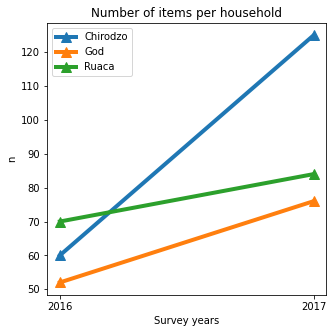

In [22]:
# list(df_line.loc[df_hist['village']=='God','items_owned'])

year = list(df_line['year'].unique())
villages = list(df_line['village'].unique())

fig, ax = plt.subplots()

for v in villages:
    data_plot = list(df_line.loc[df_line['village'] == v ,'items_owned'])
    ax.plot(year, data_plot, label = v, 
            linewidth=4, marker='^', markersize=10)
    
ax.legend()
ax.set_ylabel('n')
ax.set_xlabel('Survey years')
ax.set_title('Number of items per household');

**SEABORN**

In [23]:
import seaborn as sns

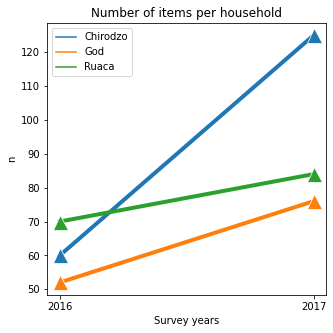

In [24]:
fig, ax = plt.subplots()

fig = sns.lineplot(data=df_line, 
                   x="year", 
                   y="items_owned", 
                   hue="village", 
                   linewidth = 4, 
                   marker='^', 
                   markersize=15)
ax.legend()
ax.set_ylabel('n')
ax.set_xlabel('Survey years')
ax.set_title('Number of items per household');

Vote for which module you'd like to use for plotting???????  
1. Matplotlib  
2. Seaborn

So, I'll demonstrate to you

1. Line plot
2. Bar chart
3. Scatter plot
4. Boxplot

## Line plot

Let's break our steps down:

1. Subset data of interest
2. Get the year from `interview_date` using `str.split()`
3. Get the number of items owned by househld from the `item_owned` column using `str.len()`
4. Check for NaN values, fill values with zero if necessary
5. Get the mean number of items owned in each village using `groupby().mean()`
6. Plot :)

In [25]:
df_line = df[['village','items_owned']]
df_line['year'] = df['interview_date'].str.split(' ').str[-1]
df_line['items_owned'] = df_line['items_owned'].str.len()

df_line['items_owned'].fillna(0, inplace=True)

df_line = df_line.groupby(['village','year']).mean().astype(int).reset_index()

<ipython-input-25-1ec1f89d1cb4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_line['year'] = df['interview_date'].str.split(' ').str[-1]
<ipython-input-25-1ec1f89d1cb4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_line['items_owned'] = df_line['items_owned'].str.len()
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/series.py:4529: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

In [26]:
plt.rcParams['figure.figsize'] = [5, 5]

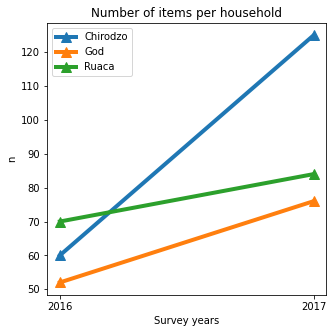

In [27]:
# list(df_line.loc[df_hist['village']=='God','items_owned'])

year = list(df_line['year'].unique())
villages = list(df_line['village'].unique())

fig, ax = plt.subplots()

for v in villages:
    data_plot = list(df_line.loc[df_line['village'] == v ,'items_owned'])
    ax.plot(year, data_plot, label = v, 
            linewidth=4, marker='^', markersize=10)
    
ax.legend()
ax.set_ylabel('n')
ax.set_xlabel('Survey years')
ax.set_title('Number of items per household');
plt.savefig('line_plot.png', dpi = 300, facecolor="w", edgecolor='w')

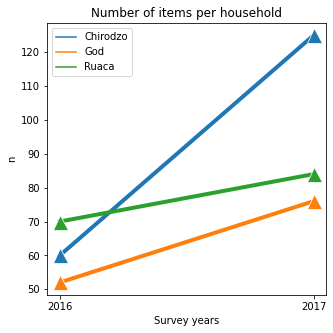

In [28]:
fig, ax = plt.subplots()

fig = sns.lineplot(data=df_line, x="year", y="items_owned", 
                   hue="village", linewidth = 4, marker='^', markersize=15)
ax.legend()
ax.set_ylabel('n')
ax.set_xlabel('Survey years')
ax.set_title('Number of items per household');

## Bar chart with error bars

Let's break our steps down:

1. Let's get some data of interest. Here, I'm using `village and member_count` 
    1.1 `member_count` == *n* members in the household  
2. Create a figure object `fig`, and axis object `ax` in the figure using `plt.subplots()`
3. Create a array (same as list for now) with the count of the numbers of bars `x_position`
4. Get the data ready   
    4.1. Get list of unique villages  
    4.2. Get `mean` and `std` of `member_count` into lists  
5. Plot!

In [29]:
df_bar = df[['village','members_count']].fillna(0)
df_bar = df.groupby(['village'])['members_count'].describe()[['mean','std']].round(2).reset_index()

villages = list(df['village'].unique())
x_position = np.arange(len(villages))
list_means = list(df_bar['mean'])
list_std = list(df_bar['std'])

# df_bar

In [30]:
plt.rcParams['figure.figsize'] = [8, 4]

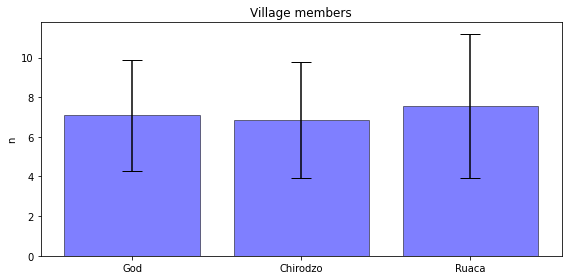

In [31]:
# create object
fig, ax = plt.subplots()

# add bars
ax.bar(x_position, list_means, yerr = list_std, 
       color = "blue", alpha=0.5, edgecolor = "black",       ## bar
       ecolor='black', capsize=10) ## error bar whisker

# customizations
ax.set_ylabel('n')
ax.set_xticks(x_position)
ax.set_xticklabels(villages)
ax.set_title('Village members')
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png', dpi = 300, facecolor="w", edgecolor='w')

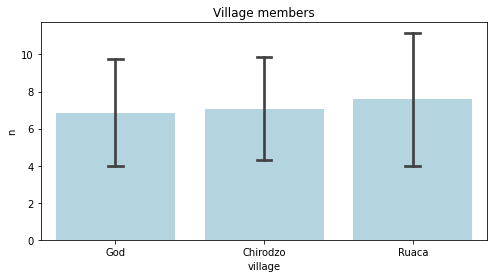

In [32]:
df_bar = df[['village','members_count']].fillna(0)

fig, ax = plt.subplots()

ax = sns.barplot(x="village", y="members_count", data=df_bar,
                capsize=.1, ci="sd", color = 'lightblue')
ax.set_title('Village members')
ax.set_ylabel('n');

## Scatter plot

Let's break our steps down:

1. Let's get some data of interest. Here, I'm using `village and items_owned and years_farm`  
2. Create a figure object `fig`, and axis object `ax` in the figure using `plt.subplots()`
4. Get the data ready     
   4.1. `fillna()`  
   4.2. Get year column using `str.split()`  
5. Plot!

In [33]:
df_scat = df[['village','items_owned','years_farm']]
df_scat['items_owned'].fillna(0, inplace=True)
df_scat['year'] = df['interview_date'].str.split(' ').str[-1]
df_scat['items_owned'] = df_scat['items_owned'].str.len()

# df_scat

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/series.py:4529: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-33-e9d7bac74fbb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scat['year'] = df['interview_date'].str.split(' ').str[-1]
<ipython-input-33-e9d7bac74fbb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [34]:
plt.rcParams['figure.figsize'] = [7, 5]

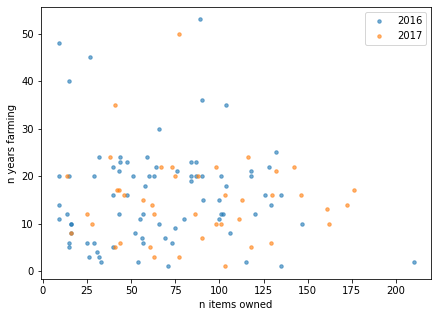

In [35]:
fig, ax = plt.subplots()

for year in list(df_scat['year'].unique()):
    temp_data = df_scat[df_scat['year']==year]
    ax.scatter(x=temp_data['items_owned'], y=temp_data['years_farm'],
               alpha=0.6, s=12,
               label = year)

ax.set_ylabel('n years farming')
ax.set_xlabel('n items owned')
ax.legend();

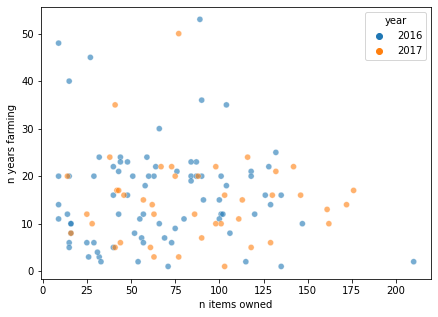

In [36]:
fig, ax = plt.subplots()
ax = sns.scatterplot(x ='items_owned', y='years_farm', data=df_scat, hue="year", alpha=0.6)
ax.set_ylabel('n years farming')
ax.set_xlabel('n items owned');

In [37]:
plt.rcParams['figure.figsize'] = [15,5]

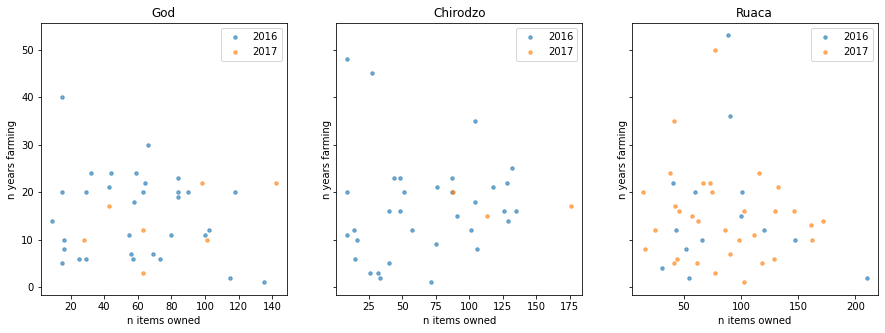

In [38]:
fig, subplots = plt.subplots(nrows=1, ncols=3, sharey=True)

list_village_subplot = list(zip(subplots, list(df_scat['village'].unique()) ))

for subplot,village in list_village_subplot:
    temp_data = df_scat[df_scat['village']==village] 
    for year in list(temp_data['year'].unique()):
        # print(subplot, village, year)
        subplot.scatter(x=temp_data.loc[temp_data['year']==year,'items_owned'], 
                        y=temp_data.loc[temp_data['year']==year,'years_farm'],
                        alpha=0.6, s=12,
                        # c=dict_years[year],
                        label=year)
        subplot.set_title(village)
        subplot.set_xlabel('n items owned')
        subplot.set_ylabel('n years farming')
        subplot.legend();

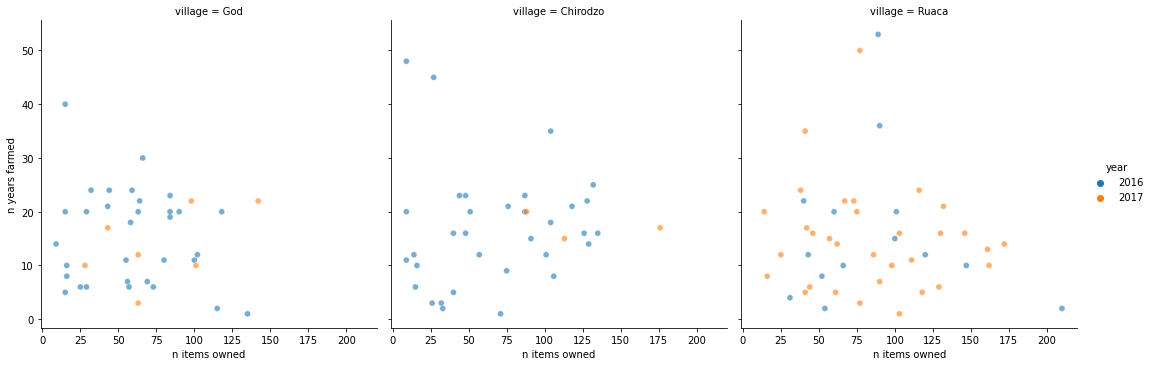

In [39]:
g = sns.relplot(x ='items_owned', y='years_farm', data=df_scat, 
            hue="year", alpha=0.6, col="village");
g.set_axis_labels("n items owned", "n years farmed");

## Box plot

Let's break our steps down:

1. Let's get some data of interest. Here, I'm using `village and items_owned and years_farm`  
2. Create a figure object `fig`, and axis object `ax` in the figure using `plt.subplots()`
4. Get the data ready     
5. Plot!

In [40]:
df_box = df[['village','gps_Altitude']]
# df_box.isnull().sum()
df_box.head()

,village,gps_Altitude
0,God,698
1,God,690
2,God,674
3,God,679
4,God,689


In [41]:
plt.rcParams['figure.figsize'] = [7, 5]

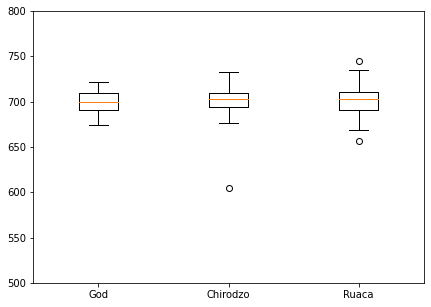

In [42]:
fig, ax = plt.subplots()

data = []

for village in list(df_box['village'].unique()):
    temp_data = df_box.loc[df_box['village']==village,'gps_Altitude']
    data.append(temp_data)

ax.boxplot(data)
ax.set_xticklabels(list(df_box['village'].unique())) 
ax.set_ylim(500, 800);

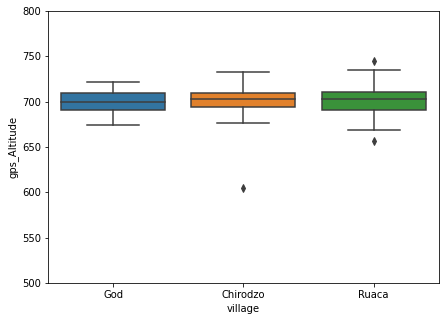

In [43]:
fig,ax = plt.subplots()

ax = sns.boxplot(x="village", y="gps_Altitude", data=df_box)

ax.set_xticklabels(list(df_box['village'].unique())) 
ax.set_ylim(500, 800);

<ipython-input-44-3ec8994f2db0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_box['year'] = df['interview_date'].str.split(' ').str[-1]


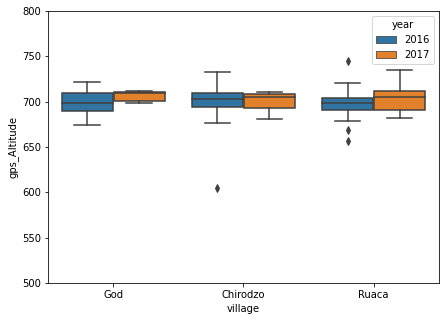

In [44]:
df_box['year'] = df['interview_date'].str.split(' ').str[-1]

fig,ax = plt.subplots()

ax = sns.boxplot(x="village", y="gps_Altitude", data=df_box, hue="year")

ax.set_xticklabels(list(df_box['village'].unique())) 
ax.set_ylim(500, 800);

# SQLite Databases

`pandas` == pandas dataframe  
`SQLite` == SQL table

SQLite is a relational database system. It provides mechanisms to create and query databases using simple commands. The *Lite* in the name related to the relatively simple interface and commandas required to deal with large databases. SQLite can handle LARGE databases, I mean terabyte-size databases.

Python has a module `sqlite3` that allows us to access SQLite mechanisms.

The methods for tabular data/database manipulation we just learned in `pandas` can also be done in SQLite. So `pandas` and `SQLite` are equivalent in that way since they share data manipulations like slicing, subsetting, aggregating, etc.

The main difference is that `pandas` dataframe is held *in memory* within the Python environment, and SQL table is *on disc* when you access it. Because SQL is *on disc* (in storage), we can work with large tables. Depending on your RAM and your Python environment, you might now have enough memory to hold those databases like SQL.

*in memory* == relies on the computer's memory (RAM, random access memory) for storing data  
*on disk* == relies on the computer's storage/hard drive 

1. Import `sqlite3`
1. Download a `sqlite` database
3. Make a connection to the database `connect()`
4. Create a cursor for the database `cursor()`
5. Execute SQL statements `execute()` and `fetchall()`
6. Using `pandas` to read a database table
7. Save the table as SQLite table using `commit()`
8. Close the connection

## Import `sqlite3`

In [45]:
import sqlite3

## Download a `.sqlite` database

https://datacarpentry.org/sql-socialsci/setup.html

https://datacarpentry.org/sql-socialsci/data/SQL_SAFI.sqlite

1. Click on the link. Download should start automatically
2. Move the downloaded file into the folder where you have your jupyter notebook
3. Create a copy of the database, and rename it to *original*  
    This is so we have a copy of the original file, because in this part we'll overwrite the database. 

## Make a connection `connect()`

To work with a SQL table, we need to first make a connect to the database. This is equivalent to `df = pd.read_csv()`. 

We'll assign the connection to a variable called `con`. 

In [46]:
# con is a convention variable name to indicate connection
con = sqlite3.connect('SQL_SAFI.sqlite')

## Create a cursor for the database `cursor()`

The cursors allows us to pass SQL statements to the database, have them executed, and then get the results back.

In [47]:
cur = con.cursor()

## Execute a command `execute()` and `fetchall()`

Now, we are going to "use" the cursor to execute SQL statements and the get output.

The `execute()` method doesn't return any query results directly. Here, I want to know the table names in this database.

In [48]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")

To get the output, which is the name of the tables, we need to use `fetchall()`

In [49]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()

[('Farms',), ('Crops',), ('Plots',), ('crops_rice_old',)]

Let's get the contents of the table `Crops`.

In [50]:
cur.execute('SELECT * FROM Crops').fetchall()

[(1, 1, 1, 1, 'maize', 1),
 (1, 2, 1, 1, 'maize', 1),
 (2, 1, 1, 1, 'maize', 1),
 (2, 2, 1, 1, 'tomatoes', 1),
 (2, 3, 1, 1, 'vegetable', 1),
 (3, 1, 1, 1, 'maize', 1),
 (4, 1, 1, 1, 'maize', 1),
 (4, 2, 1, 1, 'maize', 1),
 (4, 3, 1, 1, 'sorghum', 1),
 (5, 1, 1, 1, 'maize', 1),
 (5, 2, 1, 1, 'maize', 1),
 (6, 1, 1, 1, 'maize', 1),
 (7, 1, 1, 1, 'maize', 1),
 (7, 2, 1, 1, 'tomatoes', 1),
 (7, 3, 1, 1, 'beans', 1),
 (7, 4, 1, 1, 'vegetable', 1),
 (8, 1, 1, 1, 'maize', 1),
 (8, 2, 1, 1, 'maize', 1),
 (9, 1, 1, 1, 'maize', 1),
 (9, 2, 1, 1, 'tomatoes', 1),
 (9, 3, 1, 1, 'vegetable', 1),
 (10, 1, 1, 1, 'maize', 1),
 (10, 2, 1, 1, 'tomatoes', 1),
 (11, 1, 1, 1, 'maize', 1),
 (11, 2, 1, 1, 'maize', 1),
 (12, 1, 1, 0, 'maize', 0),
 (12, 2, 1, 1, 'tomatoes', 1),
 (13, 1, 1, 1, 'maize', 1),
 (13, 2, 1, 1, 'beans', 1),
 (13, 3, 1, 1, 'vegetable', 1),
 (13, 4, 1, 1, 'onion', 1),
 (14, 1, 1, 1, 'maize', 1),
 (14, 2, 1, 1, 'maize', 1),
 (14, 3, 1, 1, 'maize', 1),
 (15, 1, 1, 1, 'maize', 1),
 (15, 2,

Depending on the size of the database, it might not be wise to fetch all data from a table.

We can use `fetchone()` to retrieve the first row:

In [51]:
cur.execute('SELECT * FROM Crops').fetchone()

(1, 1, 1, 1, 'maize', 1)

We can also use `fetchmany()` to retrieve the first few rows:

In [52]:
cur.execute('SELECT * FROM Crops').fetchmany(5)

[(1, 1, 1, 1, 'maize', 1),
 (1, 2, 1, 1, 'maize', 1),
 (2, 1, 1, 1, 'maize', 1),
 (2, 2, 1, 1, 'tomatoes', 1),
 (2, 3, 1, 1, 'vegetable', 1)]

OR we could slice the output exactly like we did before. This is Python afterall :)

In [53]:
cur.execute('SELECT * FROM Crops').fetchall()[:5]

[(1, 1, 1, 1, 'maize', 1),
 (1, 2, 1, 1, 'maize', 1),
 (2, 1, 1, 1, 'maize', 1),
 (2, 2, 1, 1, 'tomatoes', 1),
 (2, 3, 1, 1, 'vegetable', 1)]

We only get the rows, the table names are not included. So, now let's find the column names:

In [54]:
for name in cur.description:
    print(name[0])

Id
plot_Id
crop_Id
D05_times
D_curr_crop
D_repeat_times_count


In [55]:
cur.execute('SELECT D_curr_crop FROM Crops').fetchall()[:5]

[('maize',), ('maize',), ('maize',), ('tomatoes',), ('vegetable',)]

In [56]:
cur.execute("""SELECT D_curr_crop, count(D_curr_crop) 
                FROM Crops 
                GROUP BY D_curr_crop 
                ORDER BY D_curr_crop""").fetchall()

[(None, 0),
 ('amendoim', 2),
 ('baby_corn', 11),
 ('bananas', 4),
 ('beans', 43),
 ('cabbage', 14),
 ('cassava', 4),
 ('cucumber', 1),
 ('green_beans', 2),
 ('green_pepper', 3),
 ('maize', 392),
 ('manioc', 2),
 ('millet', 7),
 ('ngogwe', 2),
 ('onion', 21),
 ('other', 24),
 ('peanut', 9),
 ('pigeonpeas', 6),
 ('piri_piri', 11),
 ('potatoes', 2),
 ('rice', 169),
 ('sesame', 24),
 ('sorghum', 125),
 ('sunflower', 1),
 ('sweetpotato', 7),
 ('tomatoes', 99),
 ('vegetable', 54)]

## Using `pandas` to read a SQL table

In [57]:
df = pd.read_sql_query('SELECT * FROM Crops', con)
df = df.groupby('D_curr_crop').size().to_frame('count').reset_index().sort_values('D_curr_crop')
df.to_sql('Count_D_crop', con)

In [58]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()

[('Farms',), ('Crops',), ('Plots',), ('crops_rice_old',), ('Count_D_crop',)]

## Save changes using `commit()`

In [59]:
con.commit()

## Close the connection

In [60]:
con.close()

<img src="https://media.giphy.com/media/5IT69msgpaOcg/giphy.gif" width="750" align="center">

**Which one are you?**  
#1  
<img src="https://media.giphy.com/media/7yDthHaq2haXS/giphy.gif" width="300" align="left">   

#2   
<img src="https://media.giphy.com/media/JIX9t2j0ZTN9S/giphy.gif" width="300" align="left"> 